# Procesamiento de audio con python `librosa`

## Identificación de Tono

In [ ]:
!sudo apt-get install python3-pyaudio

In [ ]:
!pip install librosa pydub

Extraemos el audio y lo guardamos

In [ ]:
# @title Funciones Python

nombre_archivo = "prueba1" # @param {type:"string"}
import base64

def decode_audio(input_base64):
    audio_data = base64.b64decode(input_base64.split(',')[1])
    with open(f'{nombre_archivo}.wav', 'wb') as file:
        file.write(audio_data)
# Aquí debes llamar a decode_audio con la cadena base64 que obtuviste de JavaScript

from google.colab import output
from IPython.display import Javascript

def save_audio(data):
    decode_audio(data)

output.register_callback('notebook.save_audio', save_audio)


In [ ]:
# @title Interfaz JS
%%html
<link href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.2/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-T3c6CoIi6uLrA9TneNEoa7RxnatzjcDSCmG1MXxSR1GAsXEV/Dwwykc2MPK8M2HN" crossorigin="anonymous">
<div>
    <button id = "init"class="btn btn-outline-success" onclick="startRecording()">Iniciar</button>
    <button class="btn btn-outline-danger" onclick="stopRecording()">Detener</button>
    <div id = "state"></div>
</div>
<script>
  var state = document.getElementById("state")
  let mediaRecorder;
    let audioChunks = [];

    function startRecording() {
        navigator.mediaDevices.getUserMedia({ audio: true })
            .then(stream => {
                mediaRecorder = new MediaRecorder(stream);
                mediaRecorder.mimeType = 'audio/wav'
                mediaRecorder.ondataavailable = event => {
                    audioChunks.push(event.data);
                };
                mediaRecorder.start();
                state.innerText = "Grabando..."
                state.style.color = "var(--bs-success)"
            });
    }

    function stopRecording() {
        mediaRecorder.stop();
        mediaRecorder.onstop = () => {
            const audioBlob = new Blob(audioChunks, { type: 'audio/wav' });
            state.innerText = ''
            const reader = new FileReader();
            reader.readAsDataURL(audioBlob)
            reader.onloadend = function() {
              const base64data = reader.result;

              google.colab.kernel.invokeFunction('notebook.save_audio', [base64data], {});
            };

            // Aquí necesitarás enviar el audioBlob a Python
        };
        audioChunks = [];

    }
</script>

Cargamos el audio desde la carpeta `content` en google colab

In [ ]:
import librosa
import numpy as np
from IPython.display import Audio

archivo = "/content/prueba1.wav"
audio, sr = librosa.load(archivo)

pitches, magnitudes = librosa.piptrack(y = audio, sr = sr)
Audio(data = audio, rate = sr)

<ipython-input-103-7ec2041f37a8>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(archivo)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [ ]:
def extraer_tono_predominante(pitches, magnitudes):
  frecuencias_index = magnitudes.argmax(axis = 0)
  tono_predominante = pitches[frecuencias_index, range(pitches.shape[1])]
  return tono_predominante

# Obtener el tono predominante
tono_predominante = extraer_tono_predominante(pitches, magnitudes)

# Imprimir el tono predominante (frecuencia en Hz)
print(tono_predominante)

[ 161.40956  160.8027   307.7837   307.98956  307.43658  306.58673
  307.56805  308.72116  308.6841   309.6105   307.75107  306.42374
  307.39743  308.73444  307.66748  307.35468  306.88104  304.31406
  310.80038  310.19595  309.96616  307.94333  306.3884   307.87
 3785.904   3786.16    3043.6335  1892.8304   307.3077   310.99887
  307.8948   307.84033 1891.6204  3613.1592  3616.641    308.3222
  308.63394  306.94077  313.0571   316.8613   325.08588  322.26508
  317.64984  315.02338  323.48547  332.24298  329.80502  325.03436
  320.3319   303.4164   317.5487   323.97556  393.8144   383.54587
  380.07645  380.72757  386.43536  393.1243   282.10693  285.569
  434.694    439.58237  436.6004   432.0594   430.52042  153.4572
  193.61502  446.68707  330.44012  429.17868  423.64282  308.88306
  495.68958  487.3822   485.28128  482.3535   486.02286  491.32648
  587.6784   586.9737   492.75888  488.5084   484.01837  477.32916
  380.20303  378.07983  475.13953  563.7133   561.9247   551.3099
  6

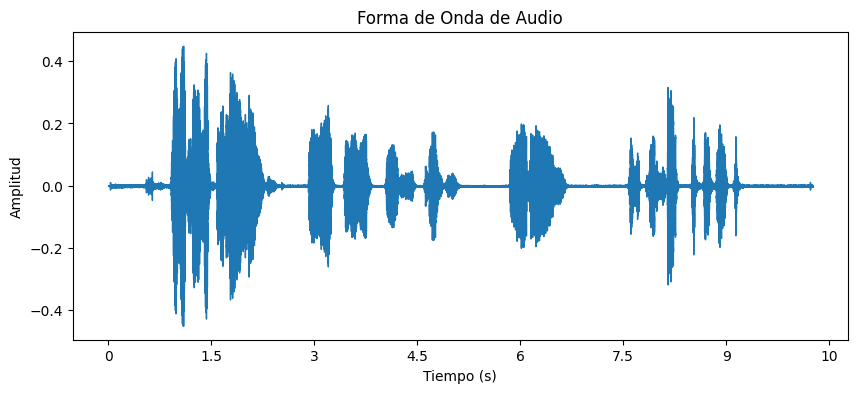

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# 1. Visualización de la Onda de Audio
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title('Forma de Onda de Audio')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

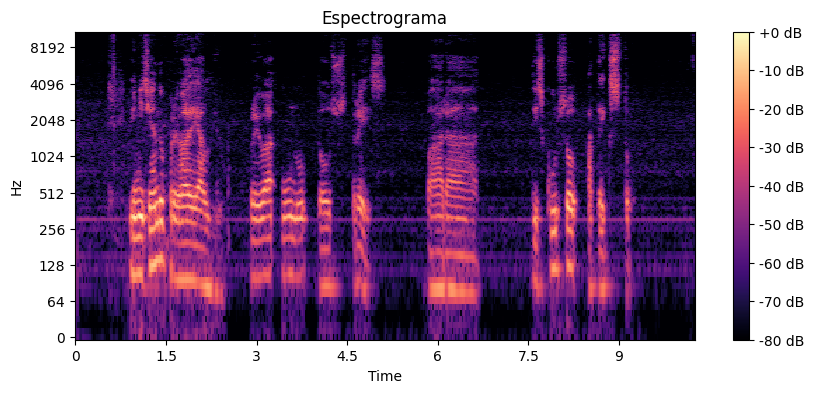

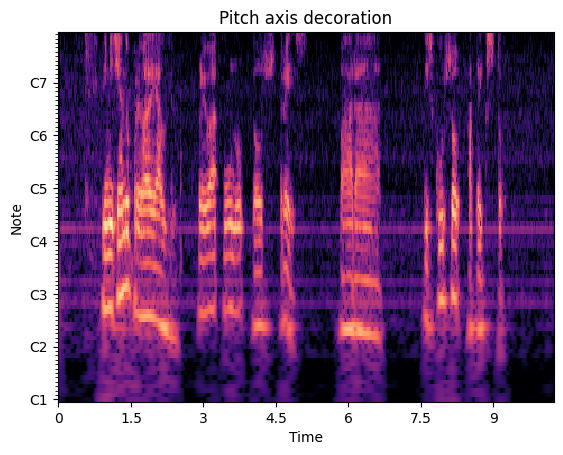

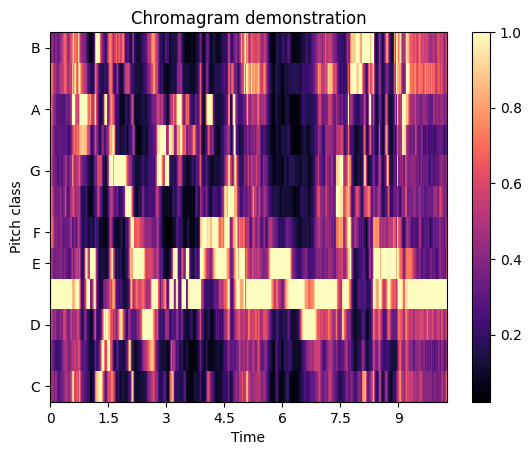

In [ ]:
# 2. Espectrograma
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma')
plt.show()

C = librosa.cqt(y=audio, sr=sr)
C_db = librosa.amplitude_to_db(np.abs(C), ref=np.max)

fig, ax = plt.subplots()
librosa.display.specshow(C_db, y_axis='cqt_note', x_axis='time', ax=ax)
ax.set(title='Pitch axis decoration')

chroma = librosa.feature.chroma_cqt(y=audio, sr=sr)
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
ax.set(title='Chromagram demonstration')
fig.colorbar(img, ax=ax)

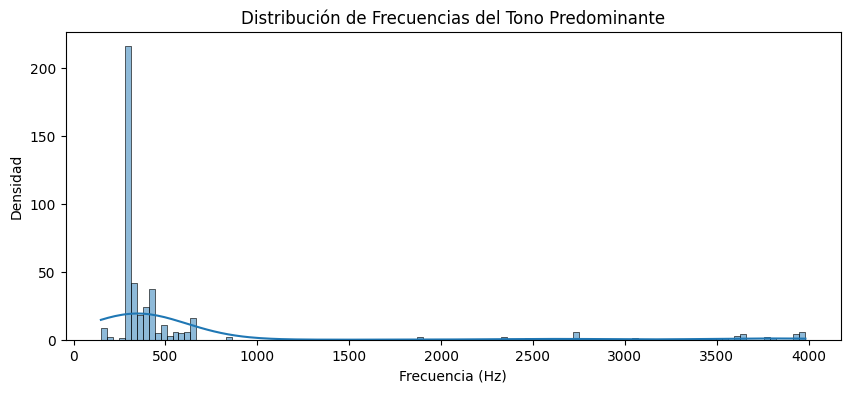

In [ ]:
# 3. Distribución de Frecuencias de Tono Predominante
pitches, magnitudes = librosa.piptrack(y=audio, sr=sr)
tono_predominante = extraer_tono_predominante(pitches, magnitudes)
plt.figure(figsize=(10, 4))
sns.histplot(tono_predominante, kde=True)
plt.title('Distribución de Frecuencias del Tono Predominante')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad')
plt.show()

Identificamos la nota relacionada al tono predominante

In [ ]:
from statistics import mode
def frecuencia_a_nota(frecuencia):
    # Definir la frecuencia de la nota A4 (La) como punto de referencia
    A4 = 440
    C0 = A4 * pow(2, -4.75)
    nombre_notas = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

    if frecuencia == 0:
        return None

    # Calcular el número de semitonos respecto a C0
    semitonos = round(12 * np.log2(frecuencia / C0))
    # Calcular la octava
    octava = semitonos // 12
    # Calcular el índice de la nota
    indice_nota = semitonos % 12
    # Obtener la nota
    nota = nombre_notas[indice_nota]

    return nota + str(octava)

# Ejemplo de uso
frecuencia = mode(tono_predominante.round(0))  # Frecuencia en Hz (A4)
nota = frecuencia_a_nota(frecuencia)
print(f"La frecuencia {frecuencia} Hz corresponde a la nota {nota}")


La frecuencia 305.0 Hz corresponde a la nota D#4


## Separación de Voces

En esta sección se demuestra una técnica sencilla para separar las voces (y otras señales esporádicas de primer plano) de la instrumentación que las acompaña.

### Advertencia
  Este ejemplo es principalmente de interés histórico y no es recomendable como método competitivo para la separación de fuentes vocales.
  Para un tratamiento más reciente de la separación de fuentes vocales y musicales, consulte`Open Source Tools & Data for Music Source Separation` <https://source-separation.github.io/tutorial/landing.html>


Code source: Brian McFee

License: ISC



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

import librosa

#############################################
# Load an example with vocals.
y, sr = librosa.load(librosa.ex('fishin'), duration=120)
# y, sr = librosa.load('/content/grabacion.wav')


# And compute the spectrogram magnitude and phase
S_full, phase = librosa.magphase(librosa.stft(y))

# Play back a 5-second excerpt with vocals
Audio(data=y[10*sr:20*sr], rate=sr)



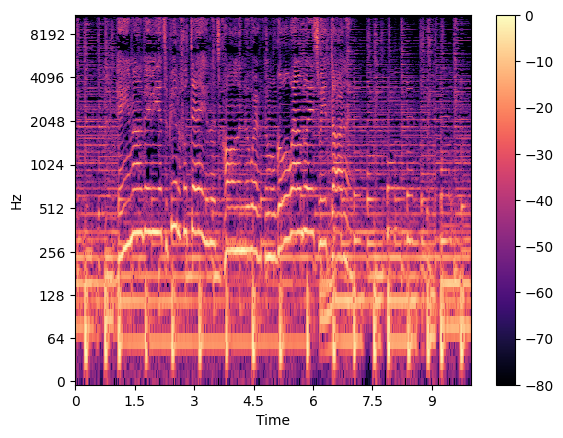

In [ ]:
#######################################
# Plot a 5-second slice of the spectrum
idx = slice(*librosa.time_to_frames([10, 20], sr=sr))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr, ax=ax)
fig.colorbar(img, ax=ax)
plt.show()

Las líneas ondulantes de arriba se deben al componente vocal.
Nuestro objetivo es separarlos de la instrumentación que los acompaña.

Compararemos fotogramas utilizando similitud de coseno y agregaremos fotogramas similares tomando su valor mediano (por frecuencia).
Para evitar verse sesgados por la continuidad local, restringimos que los fotogramas similares estén separados por al menos 2 segundos.
Esto suprime las desviaciones escasas/no repetitivas del espectro promedio y funciona bien para descartar elementos vocales.

In [ ]:
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))

La salida del filtro no debería ser mayor que la entrada si asumimos que las señales son aditivas. Tomar el mínimo puntual con el espectro de entrada obliga a esto.


In [ ]:
S_filter = np.minimum(S_full, S_filter)
S_filter

array([[4.5895240e-06, 2.3451148e-06, 8.1120186e-09, ..., 2.9175097e-01,
        2.6934558e-01, 2.9535738e-01],
       [4.5907295e-06, 2.3408277e-06, 5.0033089e-09, ..., 4.7993809e-01,
        3.0451342e-01, 3.2632878e-01],
       [4.5874658e-06, 2.3376019e-06, 6.3063901e-09, ..., 4.3073601e-01,
        3.0873725e-01, 6.0628146e-01],
       ...,
       [5.4321918e-05, 2.3933240e-05, 8.4072190e-06, ..., 1.8447981e-05,
        2.0566993e-05, 1.7799957e-05],
       [4.6788198e-05, 2.7360560e-05, 4.1833114e-06, ..., 1.5259939e-05,
        1.4704665e-05, 1.5519487e-05],
       [4.4673619e-05, 1.9156612e-05, 4.7666617e-06, ..., 1.1296488e-05,
        1.4185189e-05, 1.4022057e-05]], dtype=float32)

La salida del filtro sin procesar se puede usar como máscara, pero suena mejor si usamos enmascaramiento suave.

También podemos usar un margen para reducir el sangrado entre las máscaras de voces y instrumentación.

Nota: no es necesario que los márgenes sean iguales para la separación del primer plano y del fondo.

In [ ]:
margin_i, margin_v = 2, 3
power = 10

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)

# Once we have the masks, simply multiply them with the input spectrum
# to separate the components

S_foreground = mask_v * S_full
S_background = mask_i * S_full

y_foreground = librosa.istft(S_foreground * phase)
Audio(data=y_foreground[10*sr:20*sr], rate=sr)

Trazamos el mismo corte, pero separado en primer plano y fondo.

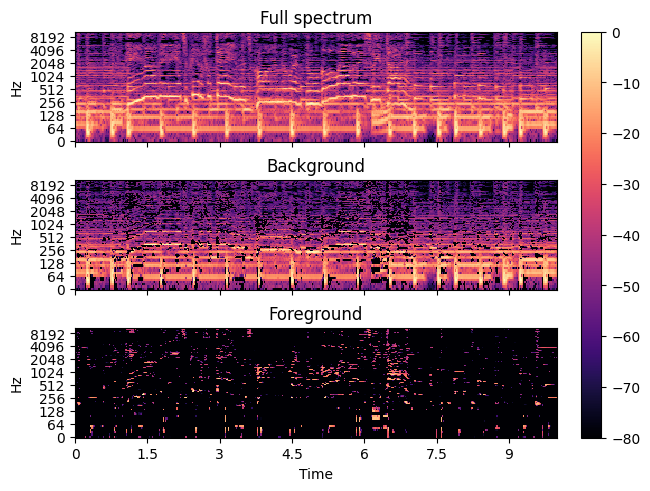

In [ ]:


# sphinx_gallery_thumbnail_number = 2

fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True,layout = "constrained" )
img = librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr, ax=ax[0])
ax[0].set(title='Full spectrum')
ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S_background[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr, ax=ax[1])
ax[1].set(title='Background')
ax[1].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S_foreground[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr, ax=ax[2])
ax[2].set(title='Foreground')
fig.colorbar(img, ax=ax)
plt.show()





## Discuroso a Texto

Los seres humanos se comunican preferentemente a través del habla utilizando el mismo idioma. El reconocimiento de voz se puede definir como la capacidad de comprender las palabras habladas de la persona que habla.

**El reconocimiento automático de voz (ASR) se refiere a la tarea de reconocer el habla humana y traducirla en texto**. Este campo de investigación ha ganado mucha atención en las últimas décadas. Es un área de investigación importante para la comunicación entre humanos y máquinas. Los primeros métodos se centraron en la extracción manual de características y técnicas convencionales como los modelos de mezcla gaussiana (GMM), el algoritmo de deformación dinámica del tiempo (DTW) y los modelos ocultos de Markov (HMM).

Más recientemente, las redes neuronales como las redes neuronales recurrentes (RNNs), las redes neuronales convolucionales (CNNs) y en los últimos años los Transformers, se han aplicado en ASR y han logrado un gran rendimiento.



### ¿Cómo funciona el Reconocimiento Automático de voz?

El flujo general de ASR se puede representar como se muestra a continuación:



![img](https://theaisummer.com/static/6b25c0cdf82a9f316a314ec08e5332d0/c483d/ASR.png)

El objetivo principal de un sistema ASR es transformar una señal de entrada de audio $x = (x_1, x_2, ... , x_T)$ con una Longitud específica $T$ en una secuencia de palabras o caracteres (es decir, etiquetas) $y = (y_1,y_2,...,y_N)$ con $y_n \in V$ Donde $V$ es el vocabulario. Las etiquetas pueden ser etiquetas de nivel de carácter (es decir, letras) o etiquetas de nivel de palabra (es decir, palabras).

Un sistema ASR típico tiene los siguientes pasos de procesamiento:

1. Preprocesamiento

2. Extracción de características

3. Clasificación

4. Modelado del lenguaje.

El paso de preprocesamiento tiene como objetivo mejorar la señal de audio reduciendo la relación señal-ruido, reduciendo el ruido y filtrando la señal.

En general, las entidades que se utilizan para ASR, se extraen con un número específico de valores o coeficientes, que se generan aplicando varios métodos en la entrada. Este paso debe ser robusto, ya que se refiere a varios factores de calidad, como el ruido o el efecto de eco.

En la era del aprendizaje profundo, las redes neuronales han mostrado una mejora significativa en la tarea de reconocimiento de voz. Se han aplicado diversos métodos, como las redes neuronales convolucionales (CNN), las redes neuronales recurrentes (RNN), mientras que recientemente las redes Transformer han logrado un gran rendimiento.

In [ ]:
!pip install SpeechRecognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 41.0 MB/s eta 0:00:00


In [ ]:
import librosa
import speech_recognition as sr
from pydub import AudioSegment
import io
y, rate = librosa.load('/content/prueba1.wav', sr = None)
Audio(data = y, rate = rate)

<ipython-input-56-65017120565c>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, rate = librosa.load('/content/prueba1.wav', sr = None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Aunque se especifique que la extensión del archivo es `.wav` la función de javascript nos guardará el archivo realmente en formato `WebM` por lo que es necesario realizar la conversión

In [ ]:
! file /content/prueba1.wav

/content/prueba1.wav: WebM


Utilizaremos `ffmpeg` que ya se encuentra instalada por defecto en google colab para hacer la conversión.

In [ ]:
!ffmpeg -i /content/prueba1.wav -acodec pcm_s16le -ar 16000 /content/prueba.wav -y

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Por lo que si revisamos el nuevo archivo su tipo estará relacionado con `.wav` o tipo `WAVE`

In [ ]:
! file /content/prueba.wav

/content/prueba.wav: RIFF (little-endian) data, WAVE audio, Microsoft PCM, 16 bit, mono 16000 Hz


In [ ]:
# la clase que permite el uso de los sitemas de traduccion son Recognizer class.
r = sr.Recognizer()


In [ ]:
import IPython.display as ipd
prueba = sr.AudioFile('/content/prueba.wav')
with prueba as source:
  r.adjust_for_ambient_noise(source)
  audio1 = r.record(source)

r.recognize_google(audio1, language = "es-CO", show_all = True)

{'alternative': [{'transcript': 'iniciando prueba de audio prueba 1 2 3 para discurso a texto',
   'confidence': 0.95097512},
  {'transcript': 'iniciando prueba de audio prueba uno dos tres para discurso a texto'}],
 'final': True}

Si se desea profundizar más en el planteamiento de las redes neuronales recurrentes detrás de la traducción de audio a texto, es recomendable revisar la siguiente [documentación](https://theaisummer.com/speech-recognition/)

## Texto a voz

Los motores de texto a voz (TTS, por sus siglas en inglés) convierten el texto escrito en habla. Funcionan a través de varios pasos:

**Preprocesamiento del Texto:** Primero, el sistema analiza el texto para entender su estructura y contenido. Esto incluye dividir el texto en oraciones y palabras, identificar puntuaciones y, a veces, entender el contexto para asignar pronunciaciones correctas a palabras que pueden tener múltiples pronunciaciones (como "read", que se pronuncia diferente dependiendo del tiempo verbal).

**Conversión de Texto a Fonemas:** El texto se descompone en fonemas, que son las unidades básicas de sonido en un idioma. Por ejemplo, la palabra "chat" se dividiría en los fonemas /ch/, /a/, /t/.

**Síntesis del Habla:** Una vez que el texto se ha convertido en fonemas, el motor de TTS utiliza una base de datos de sonidos pregrabados o generados por computadora para crear el habla. Esto puede hacerse de varias maneras, incluyendo la concatenación de sonidos grabados o la síntesis paramétrica, donde el habla se genera completamente a través de modelos computacionales.

**Control de Prosodia:** La prosodia se refiere a los elementos del habla como el tono, el ritmo y la intensidad. Un buen motor de TTS ajustará estos elementos para que el habla suene natural. Por ejemplo, puede elevar el tono al final de una pregunta.

**Salida de Audio:** Finalmente, el habla generada se reproduce a través de altavoces o se guarda en un archivo de audio.

In [ ]:
!pip install gtts

In [118]:
from gtts import gTTS
tts = gTTS(text="Me encanta la ciencia de datos", lang='es')
tts.save("DS_es.mp3")# grabar la traduccion en un archivo mp3
Audio('/content/DS_es.mp3') # escuchar el archivo creado
